In [ ]:
# ==========================================
# 1. INSTALASI & IMPORT LIBRARY
# ==========================================

# Install library 'datasets' (milik HuggingFace) untuk mendownload data GoEmotions
# Install 'wordcloud' untuk visualisasi kata
print("⏳ Sedang menginstall library tambahan...")
%pip install -q datasets wordcloud

# Import Library Pengolah Data
import pandas as pd               # Untuk membuat DataFrame (tabel)
import numpy as np                # Untuk operasi matematika array

# Import Library Visualisasi
import matplotlib.pyplot as plt   # Untuk membuat canvas grafik
import seaborn as sns             # Untuk membuat grafik statistik yang cantik
from wordcloud import WordCloud, STOPWORDS # Untuk visualisasi kata-kata dominan

# Import Library Dataset
from datasets import load_dataset # Fungsi memanggil data dari server HuggingFace

# Konfigurasi Tampilan Grafik
sns.set_style("whitegrid")        # Agar background grafik ada garis bantunya (grid)
plt.rcParams['figure.figsize'] = (12, 6) # Mengatur ukuran default grafik agar besar

print("✅ Library berhasil di-install dan di-import!")  

⏳ Sedang menginstall library tambahan...
Note: you may need to restart the kernel to use updated packages.


c:\Users\andiz\anaconda3\envs\roodio-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Library berhasil di-install dan di-import!


In [2]:
# ==========================================
# 2. LOAD DATASET DARI GOOGLE
# ==========================================

print("⏳ Sedang mendownload dataset GoEmotions (ini mungkin memakan waktu 1-2 menit)...")

# Kita gunakan versi 'simplified' agar lebih hemat memori
dataset = load_dataset("go_emotions", "simplified")

# Ubah ke format Pandas DataFrame agar enak dilihat
df = dataset['train'].to_pandas()

# Daftar Label Asli (0-27) dari dokumentasi GoEmotions
labels_list = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval",
    "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
    "joy", "love", "nervousness", "optimism", "pride", "realization",
    "relief", "remorse", "sadness", "surprise", "neutral"
]

print(f"\n✅ Dataset Berhasil Diload!")
print(f"📊 Total Data: {len(df)} kalimat")
print("\n🧐 Contoh 5 Data Teratas (Raw Data):")
display(df.head())

print("\nℹ️ Catatan:")
print("- Kolom 'text': Berisi kalimat komentar dari Reddit.")
print("- Kolom 'labels': Berisi angka (0-27) yang mewakili emosi.")

⏳ Sedang mendownload dataset GoEmotions (ini mungkin memakan waktu 1-2 menit)...


c:\Users\andiz\anaconda3\envs\roodio-env\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\andiz\.cache\huggingface\hub\datasets--go_emotions. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating test split: 100%|██████████| 5427/5427 [00:00<00:00, 165395.01 examples/s]



✅ Dataset Berhasil Diload!
📊 Total Data: 43410 kalimat

🧐 Contoh 5 Data Teratas (Raw Data):


,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj



ℹ️ Catatan:
- Kolom 'text': Berisi kalimat komentar dari Reddit.
- Kolom 'labels': Berisi angka (0-27) yang mewakili emosi.


In [3]:
# ==========================================
# 3. MAPPING KE 4 KUADRAN (LOGIKA UTAMA)
# ==========================================

print("⚙️ Sedang melakukan Mapping Emosi...")

# Definisi Mapping: Google Label -> Skripsi Label
target_map = {
    # High Arousal, Negative -> ANGRY
    'anger': 'angry', 'annoyance': 'angry', 'disapproval': 'angry',
    'fear': 'angry', 'nervousness': 'angry',

    # High Arousal, Positive -> HAPPY
    'joy': 'happy', 'excitement': 'happy', 'love': 'happy',
    'admiration': 'happy', 'amusement': 'happy', 'optimism': 'happy',
    'pride': 'happy', 'gratitude': 'happy',

    # Low Arousal, Negative -> SAD
    'sadness': 'sad', 'disappointment': 'sad', 'grief': 'sad',
    'remorse': 'sad', 'embarrassment': 'sad',

    # Low Arousal, Positive/Neutral -> RELAXED
    'relief': 'relaxed', 'neutral': 'relaxed', 'realization': 'relaxed',
    'approval': 'relaxed', 'caring': 'relaxed'
}

def map_emotion(row_labels):
    # GoEmotions bisa punya banyak label per kalimat, kita cek satu per satu
    for label_idx in row_labels:
        original_label = labels_list[label_idx]
        # Jika label asli ada di daftar target kita, ambil mappingnya
        if original_label in target_map:
            return target_map[original_label]
    return None # Jika labelnya tidak relevan (misal: curiosity), biarkan kosong

# Terapkan fungsi ke seluruh data
df['my_label'] = df['labels'].apply(map_emotion)

# Buang data yang tidak punya label (None)
df_clean = df.dropna(subset=['my_label']).copy()

print(f"✅ Mapping Selesai!")
print(f"📉 Data Awal: {len(df)} baris")
print(f"📈 Data Bersih (4 Moods): {len(df_clean)} baris")
print("\n🧐 Contoh Data Hasil Mapping:")
display(df_clean[['text', 'my_label']].head())

⚙️ Sedang melakukan Mapping Emosi...
✅ Mapping Selesai!
📉 Data Awal: 43410 baris
📈 Data Bersih (4 Moods): 39295 baris

🧐 Contoh Data Hasil Mapping:


,text,my_label
0,My favourite food is anything I didn't have to...,relaxed
1,"Now if he does off himself, everyone will thin...",relaxed
2,WHY THE FUCK IS BAYLESS ISOING,angry
3,To make her feel threatened,angry
4,Dirty Southern Wankers,angry


> Pemetaan label emosi dilakukan dengan mengadopsi Russell's Circumplex Model of Affect, yang mengkategorikan emosi berdasarkan dimensi Valence (Positif-Negatif) dan Arousal (Aktif-Pasif). 27 label emosi dari dataset GoEmotions disederhanakan menjadi 4 kelas utama (Angry, Happy, Relaxed, Sad) berdasarkan karakteristik tingkat energi dan polaritas emosinya. Misalnya, label 'fear' dan 'nervousness' dikelompokkan ke dalam kelas 'Angry' karena keduanya memiliki karakteristik High Arousal dan Negative Valence yang setara dalam representasi audio musikal.

📊 Statistik Jumlah Data per Mood:
my_label
relaxed    17523
happy      12998
angry       6033
sad         2741
Name: count, dtype: int64


C:\Users\andiz\AppData\Local\Temp\ipykernel_15560\15631645.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='my_label', data=df_clean, order=['angry', 'happy', 'relaxed', 'sad'], palette='viridis')


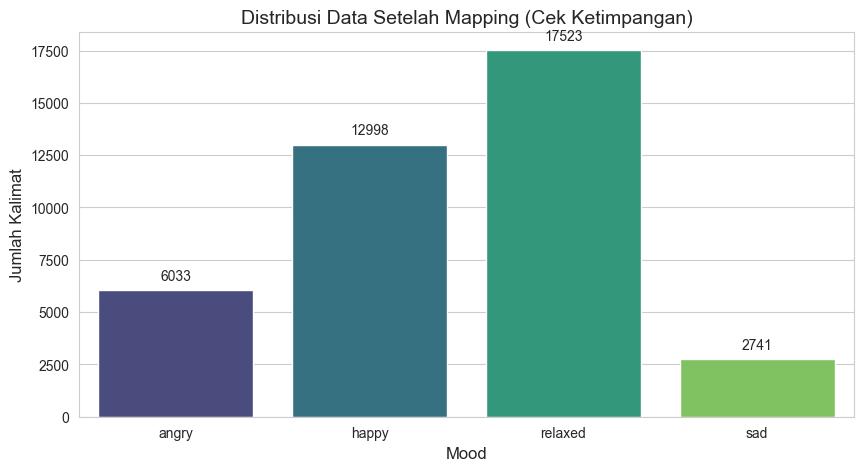

C:\Users\andiz\AppData\Local\Temp\ipykernel_15560\15631645.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='my_label', y='word_count', data=df_clean, palette='pastel', order=['angry', 'happy', 'relaxed', 'sad'])


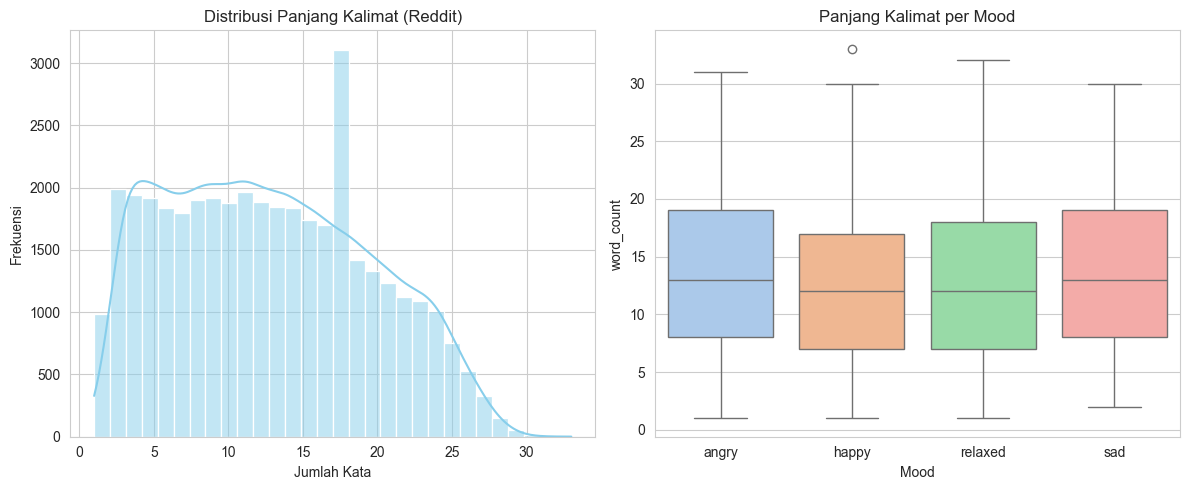

📏 Rata-rata Panjang Kalimat: 12.80 kata
📏 Max Panjang Kalimat: 33 kata


In [4]:
# ==========================================
# 4. VISUALISASI DISTRIBUSI KELAS
# ==========================================

# 1. Hitung Jumlah Data per Mood
mood_counts = df_clean['my_label'].value_counts()
print("📊 Statistik Jumlah Data per Mood:")
print(mood_counts)

# 2. Buat Grafik Batang (Bar Chart)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='my_label', data=df_clean, order=['angry', 'happy', 'relaxed', 'sad'], palette='viridis')

plt.title('Distribusi Data Setelah Mapping (Cek Ketimpangan)', fontsize=14)
plt.xlabel('Mood', fontsize=12)
plt.ylabel('Jumlah Kalimat', fontsize=12)

# Tambahkan angka di atas batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# ==========================================
# 5. ANALISIS PANJANG TEKS (Word Count)
# ==========================================
# Kita perlu tahu seberapa panjang rata-rata kalimat di dataset ini
# untuk menentukan 'max_length' saat tokenisasi nanti.

df_clean['word_count'] = df_clean['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 5))

# Plot Kiri: Histogram Panjang Kata
plt.subplot(1, 2, 1)
sns.histplot(df_clean['word_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Panjang Kalimat (Reddit)', fontsize=12)
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')

# Plot Kanan: Boxplot per Mood
plt.subplot(1, 2, 2)
sns.boxplot(x='my_label', y='word_count', data=df_clean, palette='pastel', order=['angry', 'happy', 'relaxed', 'sad'])
plt.title('Panjang Kalimat per Mood', fontsize=12)
plt.xlabel('Mood')

plt.tight_layout()
plt.show()

print(f"📏 Rata-rata Panjang Kalimat: {df_clean['word_count'].mean():.2f} kata")
print(f"📏 Max Panjang Kalimat: {df_clean['word_count'].max()} kata")

Berdasarkan grafik hasil EDA diatas, masalah utamanya sudah sangat jelas: KETIMPANGAN DATA EKSTRIM (Extreme Class Imbalance).

Lihat grafik batang pertama:

Relaxed: ~17.500 data (Raksasa 🦖)

Sad: ~2.700 data (Semut 🐜)

Dampaknya jika langsung ditraining: Model BERT Anda akan menjadi "Malas". Dia akan menebak semua lagu sebagai "Relaxed" atau "Happy" karena peluang benarnya tinggi. Dia tidak akan belajar ciri-ciri "Sad" karena sampelnya terlalu sedikit.

📊 Statistik Jumlah Data per Mood:
my_label
relaxed    17523
happy      12998
angry       6033
sad         2741
Name: count, dtype: int64


C:\Users\andiz\AppData\Local\Temp\ipykernel_15560\1006150798.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='my_label', data=df_clean, order=['angry', 'happy', 'relaxed', 'sad'], palette='viridis')


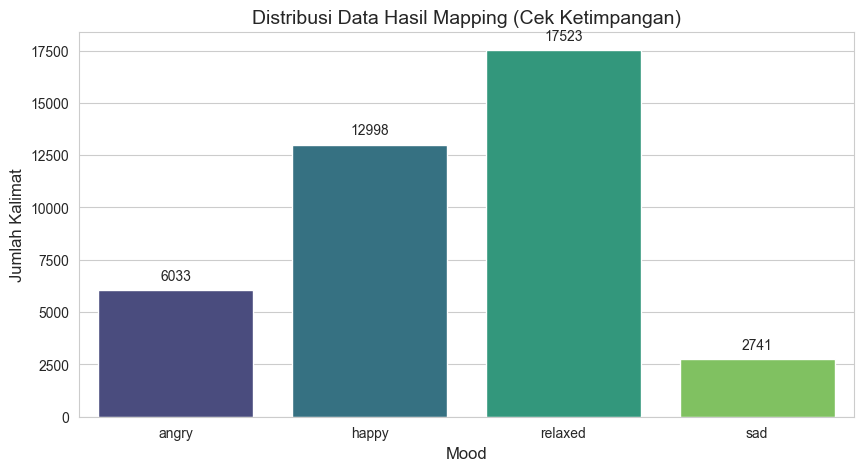


📋 KESIMPULAN EDA UNTUK BAB 3:
1. Ditemukan ketimpangan data yang signifikan (Imbalanced Dataset).
2. Kelas terbanyak mencapai 17523 sampel, sedangkan terkecil hanya 2741.
3. Gap sebesar 14782 sampel berpotensi membuat model bias.
4. REKOMENDASI PREPROCESSING: Perlu dilakukan 'Undersampling' atau 'Oversampling' pada tahap selanjutnya agar jumlah data seimbang di angka 2741.


In [5]:
# ==========================================
# 4. VISUALISASI DISTRIBUSI KELAS (DIAGNOSA)
# ==========================================

# 1. Hitung Jumlah Data per Mood
mood_counts = df_clean['my_label'].value_counts()
print("📊 Statistik Jumlah Data per Mood:")
print(mood_counts)

# 2. Buat Grafik Batang (Bar Chart)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='my_label', data=df_clean, order=['angry', 'happy', 'relaxed', 'sad'], palette='viridis')

plt.title('Distribusi Data Hasil Mapping (Cek Ketimpangan)', fontsize=14)
plt.xlabel('Mood', fontsize=12)
plt.ylabel('Jumlah Kalimat', fontsize=12)

# Tampilkan angkanya
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# ==========================================
# 5. KESIMPULAN EDA
# ==========================================
min_val = mood_counts.min()
max_val = mood_counts.max()
gap = max_val - min_val

print("\n📋 KESIMPULAN EDA UNTUK BAB 3:")
print(f"1. Ditemukan ketimpangan data yang signifikan (Imbalanced Dataset).")
print(f"2. Kelas terbanyak mencapai {max_val} sampel, sedangkan terkecil hanya {min_val}.")
print(f"3. Gap sebesar {gap} sampel berpotensi membuat model bias.")
print(f"4. REKOMENDASI PREPROCESSING: Perlu dilakukan 'Undersampling' atau 'Oversampling' pada tahap selanjutnya agar jumlah data seimbang di angka {min_val}.")